In [3]:
import numpy as np
import ctypes, time, os
import sys
import pickle
# from ipywidgets import interact, widgets

# Import visualization stuff
import matplotlib.pyplot as plt
import nibabel as nib
from nilearn import plotting
from scipy.signal import detrend

# Import popeye stuff
import popeye.utilities_cclab as utils
from popeye.visual_stimulus import VisualStimulus
# import popeye.models_cclab as prfModels
# import popeye.css_cclab as prfModels

# Import multiprocessing stuff
import multiprocessing as mp
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
from itertools import product

# Load helper functions
from dataloader import *
from fit_utils import *
from fitutils_css import *
import ctypes

%load_ext autoreload
%autoreload 2

In [11]:
simDataPath = '/d/DATA/data/popeye_pRF/Simulation/simulatedVoxels.pkl'
with open(simDataPath, 'rb') as f:
    scan_data = pickle.load(f)

# load true fit data
trueFitPath = '/d/DATA/data/popeye_pRF/Simulation/simulatedParams.pkl'
with open(trueFitPath, 'rb') as f:
    trueFitFile = pickle.load(f)
    trueFit_estims = np.asarray(trueFitFile['params_vox'])
    baseline_vox = trueFitFile['baseline_vox']

    # This is originally (x, y, sigma, n)
    # We need to convert it to (theta, r2, rho, sigma, n, x, y, beta, baseline)
    trueFit_data = np.empty((trueFit_estims.shape[0], 9))
    trueFit_data[:, 0] = np.mod(np.arctan2(trueFit_estims[:, 1], trueFit_estims[:, 0]), 2*np.pi)
    trueFit_data[:, 1] = 1
    trueFit_data[:, 2] = np.sqrt(trueFit_estims[:, 0]**2 + trueFit_estims[:, 1]**2)
    trueFit_data[:, 3] = trueFit_estims[:, 2]
    trueFit_data[:, 4] = trueFit_estims[:, 3]
    trueFit_data[:, 5] = trueFit_estims[:, 0]
    trueFit_data[:, 6] = trueFit_estims[:, 1]
    trueFit_data[:, 7] = np.zeros(trueFit_estims.shape[0])
    trueFit_data[:, 8] = baseline_vox

nvoxs = trueFit_data.shape[0]

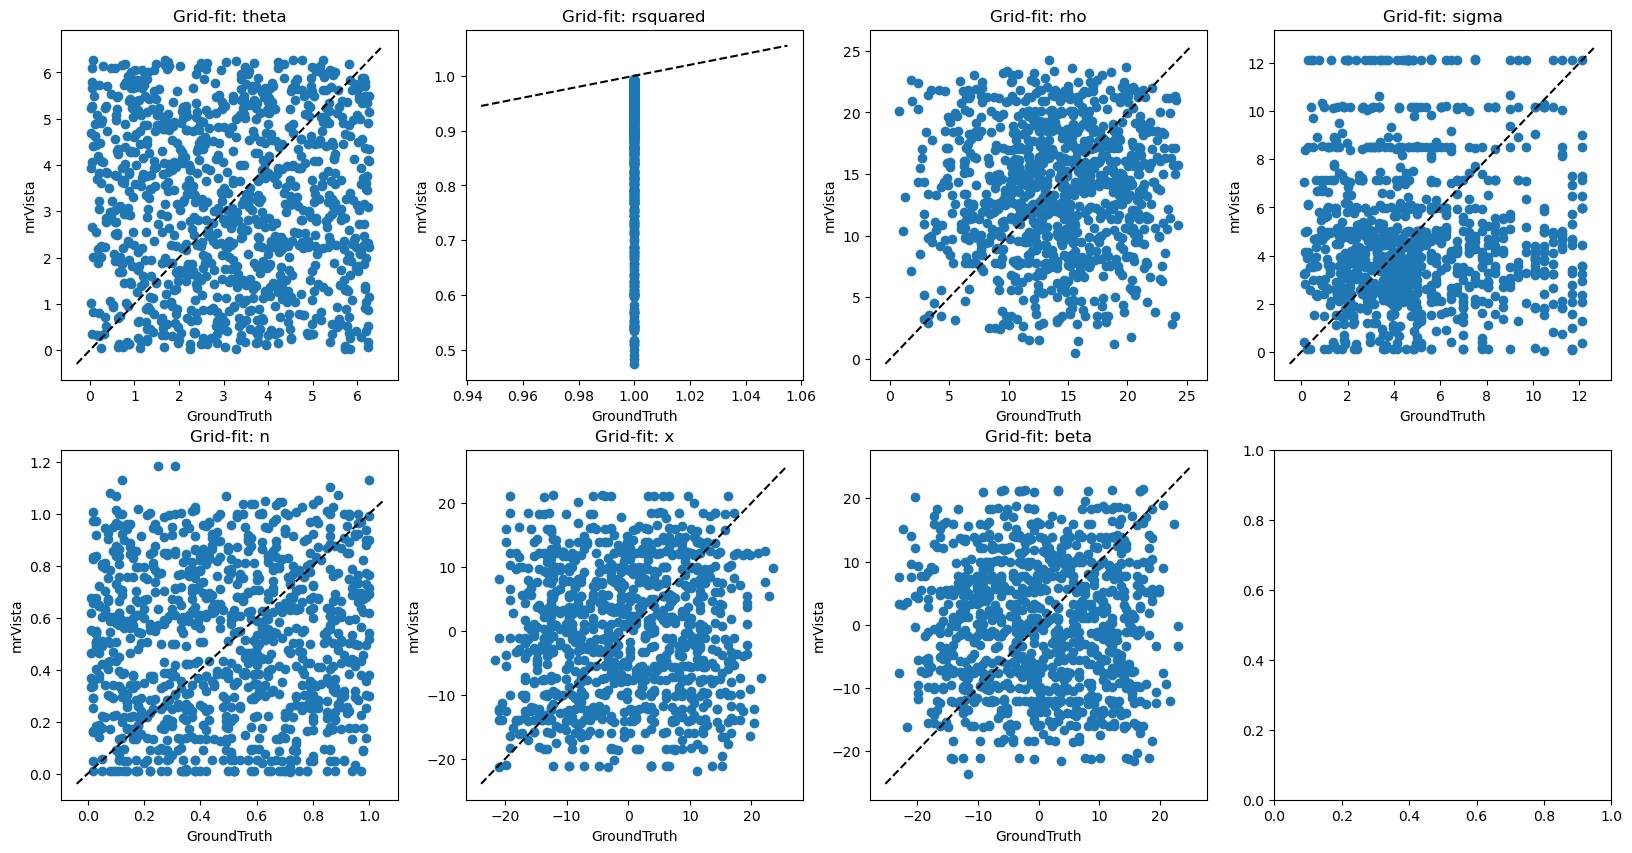

In [19]:
# mrVistaPath = '/d/DATA/data/mrVista_pRF/MD/RF1/MD_RF1_vista/Inplane/Original/RF_ss5_copy-sFit.nii.gz'
mrVistaPath = '/d/DATA/data/popeye_pRF/Simulation/popeyeFit/RF_ss5_fFit_popeye.nii.gz'
mrVistaData = nib.load(mrVistaPath)#.get_data()
mrVistaData = mrVistaData.get_fdata()#.flatten()
mrVistaData.shape
f, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()
for i in range(7):
    ax = axs[i]
    thisPred = mrVistaData[:, :, :, i].flatten()
    # ax.hist(thisPred, bins=100)
    ax.plot(trueFit_data[:, i].flatten()[:1000], thisPred[:nvoxs], 'o')
    ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
    ax.set_title(f"Grid-fit: {['theta', 'rsquared', 'rho', 'sigma','n', 'x', 'beta'][i]}")
    ax.set_xlabel('GroundTruth')
    ax.set_ylabel('mrVista')
plt.show()